In [472]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.simplefilter("ignore")

First we want to read and see the dataset in order to know how we are going to approach the cleaning.

In [1255]:
df = pd.read_csv ('./data/attacks.csv', encoding='unicode_escape')
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


See how many rows and columns there are.

In [1256]:
df.shape

(25723, 24)

We are going to make a copy and work on the copy of the dataset just in case. Then we are going to see how many rows are null in each column.

In [1257]:
df2 = df.copy()
df2.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

We see how many duplicates.

In [1258]:
df2.duplicated().sum()


19411

We are going to eliminate the duplicates and see how many null columns remain.

In [1259]:
df2.drop_duplicates(inplace = True)
df2.isna().sum()

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

Title of each column and how many rows and columns are left.

In [1260]:
df2.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [1261]:
df2.shape

(6312, 24)

### Hypothesis 1 - White sharks attack mainly males of more than 25 years old?


We are going to select only the variables we are going to use in this study. Country is going to englobe the area and location. Type and activity were considered but not included. For being less important for the study, for several reasons we are not going to select 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'.

In [1262]:
df2 = df2[['Case Number', 'Year', 'Date', 'Country', 'Sex ', 'Age', 'Fatal (Y/N)', 'Species ']]
df2.head()

,Case Number,Year,Date,Country,Sex,Age,Fatal (Y/N),Species
0,2018.06.25,2018.0,25-Jun-2018,USA,F,57,N,White shark
1,2018.06.18,2018.0,18-Jun-2018,USA,F,11,N,NaN
2,2018.06.09,2018.0,09-Jun-2018,USA,M,48,N,NaN
3,2018.06.08,2018.0,08-Jun-2018,AUSTRALIA,M,NaN,N,2 m shark
4,2018.06.04,2018.0,04-Jun-2018,MEXICO,M,NaN,N,"Tiger shark, 3m"


We are going to rename the columns of the dataset for convenience throughout the cleaning. 

In [1395]:
df2 = df2.rename(columns = {'Case Number' : 'ID', 'Sex ': 'Sex', 'Species ' : 'Species', 'Fatal (Y/N)' : 'Fatal'})
df2

,ID,Year,Date,Country,Sex,Age,Fatal,Species
0,2018.06.25,2018.0,25-Jun-2018,USA,F,57,N,White shark
1,2018.06.18,2018.0,18-Jun-2018,USA,F,11,N,NaN
2,2018.06.09,2018.0,09-Jun-2018,USA,M,48,N,NaN
3,2018.06.08,2018.0,08-Jun-2018,AUSTRALIA,M,NaN,N,2 m shark
4,2018.06.04,2018.0,04-Jun-2018,MEXICO,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are going to create another dataframe with the 3 variables we are going to use for the first hypothesis. Then we are going to drop the null rows and reset the index.

In [1468]:
df_species = df2[['Sex', 'Age', 'Species']]
df_species.dropna(axis=0, inplace=True, subset=['Age', 'Sex', 'Species'])



In [1469]:
df_species.reset_index(inplace=True)
df_species

,index,Sex,Age,Species
0,0,F,57,White shark
1,6,M,18,Tiger shark
2,7,M,52,"Lemon shark, 3'"
3,8,M,15,"Bull shark, 6'"
4,10,M,32,Grey reef shark
...,...,...,...,...
2172,6239,M,36,"""A pack of sharks"""
2173,6242,M,6,Bull shark
2174,6243,M,16,Bull shark
2175,6265,M,13 or 14,Bull shark


Make a list out of all Ages in the column 'Age'.

In [1470]:
age_list = list(df_species['Age'])
age_correction= {}

age_correction["Updated_Age"]=[]
for i in age_list:
    res = re.findall(r"\d+", i)
    if res:
        age_correction["Updated_Age"].append(res[0])
    else:
        age_correction["Updated_Age"].append(np.nan)
        
        
age_correction["Updated_Age"][:10]


['57', '18', '52', '15', '32', '21', '34', '30', '60', '32']

Create a dataframe with corrected ages and reset the index.

In [1471]:
df_age = pd.DataFrame(age_correction)
df_age

,Updated_Age
0,57
1,18
2,52
3,15
4,32
...,...
2172,36
2173,6
2174,16
2175,13


Concatenate the two dataframes with the Age Updated.

In [1472]:
df_species = pd.concat([df_species, df_age], axis=1)
df_species

,index,Sex,Age,Species,Updated_Age
0,0,F,57,White shark,57
1,6,M,18,Tiger shark,18
2,7,M,52,"Lemon shark, 3'",52
3,8,M,15,"Bull shark, 6'",15
4,10,M,32,Grey reef shark,32
...,...,...,...,...,...
2172,6239,M,36,"""A pack of sharks""",36
2173,6242,M,6,Bull shark,6
2174,6243,M,16,Bull shark,16
2175,6265,M,13 or 14,Bull shark,13


Convert the column 'Updated_Age' to integer.

In [1473]:
df_species['Updated_Age'] = df_species['Updated_Age'].astype('Int64')
df_species.dtypes



index           int64
Sex            object
Age            object
Species        object
Updated_Age     Int64
dtype: object

We create a cleaned and ordered dataframe for Hypothesis 1.

In [1474]:
df_species_cleaned = df_species.drop(['Age'], axis=1)
df_species_cleaned.head()

,index,Sex,Species,Updated_Age
0,0,F,White shark,57
1,6,M,Tiger shark,18
2,7,M,"Lemon shark, 3'",52
3,8,M,"Bull shark, 6'",15
4,10,M,Grey reef shark,32


In [1475]:
new_order = ['index', 'Updated_Age', 'Sex', 'Species']
df_species_cleaned = df_species_cleaned[new_order]
df_species_cleaned.head(11)


,index,Updated_Age,Sex,Species
0,0,57,F,White shark
1,6,18,M,Tiger shark
2,7,52,M,"Lemon shark, 3'"
3,8,15,M,"Bull shark, 6'"
4,10,32,M,Grey reef shark
5,13,21,M,Invalid incident
6,14,34,F,"Tawny nurse shark, 2m"
7,18,30,M,Tiger shark
8,21,60,M,3 m shark
9,23,32,M,Tiger shark


Make a list out of all White Sharks in the column 'Species'.

In [1476]:
ws_list = list(df_species_cleaned['Species'])
total_ws= {}

total_ws["White_Sharks"]=[]

for i in ws_list:
    res = re.findall(r"\white\s\whark", i)
    if res:
        total_ws["White_Sharks"].append((res[0]))
    else:
        total_ws["White_Sharks"].append(np.nan)
        
        
total_ws["White_Sharks"][:10]

['White shark', nan, nan, nan, nan, nan, nan, nan, nan, nan]

We create a new dataframe for sharks and drop nulls.

In [1477]:
df_ws = pd.DataFrame(total_ws)
df_ws.dropna(axis=0, inplace=True)



We change the type of White Sharks to convert it to string and capitalize.

In [1478]:
df_ws['White_Sharks'] = df_ws['White_Sharks'].astype('str')

In [1479]:
df_ws['White_Sharks'] = df_ws['White_Sharks'].apply(lambda x: x.capitalize())
df_ws


,White_Sharks
0,White shark
10,White shark
15,White shark
21,White shark
28,White shark
...,...
2137,White shark
2138,White shark
2143,White shark
2154,White shark


We concatenate and drop nulls in White Sharks. Then we drop the column species to make it better visually.

In [1480]:
df_species_cleaned = pd.concat([df_species_cleaned, df_ws], axis = 1)
df_species_cleaned.dropna(axis=0, inplace=True, subset=['White_Sharks'])


In [1481]:
df_species_cleaned = df_species_cleaned.drop(['Species'], axis=1)
df_species_cleaned

,index,Updated_Age,Sex,White_Sharks
0,0,57,F,White shark
10,24,33,M,White shark
15,34,19,M,White shark
21,40,55,F,White shark
28,50,28,M,White shark
...,...,...,...,...
2137,5229,21,M,White shark
2138,5231,18,M,White shark
2143,5311,24,M,White shark
2154,5545,29,M,White shark


We remove a row which sex was 'lli'.

In [1482]:
select_sex = df_species_cleaned.loc[df_species_cleaned['Sex']== 'lli']
select_sex

,index,Updated_Age,Sex,White_Sharks
790,1624,38,lli,White shark


In [1483]:
df_species_cleaned.drop(790, inplace=True)

Sort per age.

In [1487]:
df_species_cleaned_sorted = df_species_cleaned.sort_values('Updated_Age')
df_species_cleaned_sorted.head()

,index,Updated_Age,Sex,White_Sharks
1945,4238,10,M,White shark
1570,3240,12,M,White shark
550,1172,13,F,White shark
1415,2853,13,M,White shark
61,123,13,F,White shark


Data wrangling

Hypothesis 1: 
White sharks attack mainly males older than 25 years old?

Display attacks by sex and count victims.

In [1488]:
attacks = df_species_cleaned_sorted.groupby('Sex').agg({'Sex':'count',})
display(attacks)

,Sex
Sex,
F,37
M,385


Graph 1 - Display attacks to each sex.

Text(0.5, 0, 'Number of attacks')

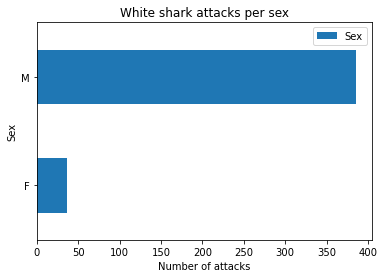

In [1489]:
graph_1 = attacks.plot.barh()
plt.title('White shark attacks per sex')
plt.xlabel('Number of attacks')

Graph 2 & 3- Display attacks by age group and differentiate by victim's sex.

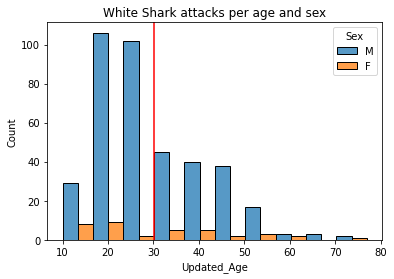

In [1493]:
graph_2 = sns.histplot(data= df_species_cleaned_sorted, x = 'Updated_Age', multiple = 'dodge', hue= 'Sex', bins=10)
plt.title('White Shark attacks per age and sex')
graph_2.axvline(x=df_species_cleaned_sorted.Updated_Age.mean(), c="red", label="mean")

Text(0.5, 1.0, 'White Shark attacks per age')

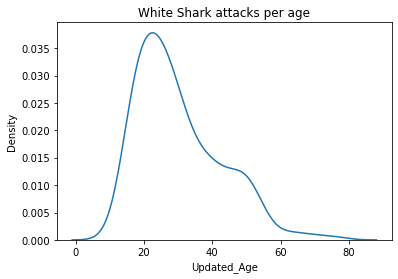

In [1491]:
graph_3 = sns.kdeplot(x=df_species_cleaned_sorted.Updated_Age)
plt.title('White Shark attacks per age')

Graph 4 - Boxplot to display the distribution and weight per age between sexes.

Text(0.5, 1.0, 'White Shark attacks per age and sex')

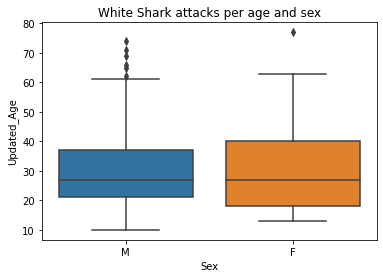

In [1492]:
graph_4 = sns.boxplot(x="Sex", y="Updated_Age", data=df_species_cleaned_sorted)
plt.title('White Shark attacks per age and sex')

### Hypothesis 2 - Fatality has decreased over the last 50 years in the USA.

In [1297]:
# Start cleaning for H2

Create a dataframe from df2 and drop nulls.

In [1495]:
df2.head()

,ID,Year,Date,Country,Sex,Age,Fatal,Species
0,2018.06.25,2018.0,25-Jun-2018,USA,F,57,N,White shark
1,2018.06.18,2018.0,18-Jun-2018,USA,F,11,N,NaN
2,2018.06.09,2018.0,09-Jun-2018,USA,M,48,N,NaN
3,2018.06.08,2018.0,08-Jun-2018,AUSTRALIA,M,NaN,N,2 m shark
4,2018.06.04,2018.0,04-Jun-2018,MEXICO,M,NaN,N,"Tiger shark, 3m"


In [1501]:
df_hypothesis2 = df2[['ID', 'Year', 'Date', 'Country', 'Fatal']]
df_hypothesis2.dropna(inplace=True)
df_hypothesis2.shape

(5716, 5)

Convert Year to integer.

In [1502]:
df_hypothesis2['Year'] = df_hypothesis2['Year'].astype('Int64')


We check if there are any duplicate ids. Here we have to count by a variable other than the id. We take year.

In [1498]:
df_countries.groupby("ID").count()[["Year"]].sort_values("Year", ascending=False).head(10)


,Year
ID,
1990.05.10,2
2014.08.02,2
1966.12.26,2
2013.10.05,2
1920.00.00.b,2
2006.09.02,2
1980.07.00,2
1962.06.11.b,2
2012.09.02.b,2


The following function evaluates all the ids and, in case, when evaluating one of them, another record with the same id already exists, it puts an "x" at the end to differentiate it.

In [1499]:
def duplicates(id_column):
    new_id_column = []
    for i in range(len(id_column)):
        new_id = str(id_column[i])
        if new_id not in new_id_column:
            new_id_column.append(new_id)
        else:
            new_id_column.append(new_id + "x")
    return new_id_column

In [1302]:
df_countries["ID"] = duplicates(list(df_countries["ID"]))
df_countries

,ID,Year,Date,Country,Fatal
0,2018.06.25,2018,25-Jun-2018,USA,N
1,2018.06.18,2018,18-Jun-2018,USA,N
2,2018.06.09,2018,09-Jun-2018,USA,N
3,2018.06.08,2018,08-Jun-2018,AUSTRALIA,N
4,2018.06.04,2018,04-Jun-2018,MEXICO,N
...,...,...,...,...,...
6297,ND.0005,0,Before 1903,AUSTRALIA,Y
6298,ND.0004,0,Before 1903,AUSTRALIA,Y
6299,ND.0003,0,1900-1905,USA,Y
6300,ND.0002,0,1883-1889,PANAMA,Y


In [1303]:
df_countries.groupby("ID").count()[["Year"]].sort_values("Year", ascending=False).head(10)


,Year
ID,
0000.0336,1
2001.04.12.d,1
2001.07.15.a,1
2001.07.06.b,1
2001.07.06.a,1
2001.07.03,1
2001.07.00,1
2001.06.12,1
2001.06.10,1


In [1304]:
countries = df_countries.groupby("Country").count()[["ID"]].sort_values('ID', ascending=False)
countries.head()

,ID
Country,
USA,2040
AUSTRALIA,1225
SOUTH AFRICA,515
PAPUA NEW GUINEA,132
NEW ZEALAND,116


In [1305]:
df_countries.groupby("Fatal").count()[["ID"]].sort_values("ID", ascending = False)


,ID
Fatal,
N,4273
Y,1363
UNKNOWN,69
N,7
2017,1
M,1
N,1
y,1


In [1306]:
df_countries['Fatal'] = df_countries['Fatal'].str.strip()
df_countries = df_countries.replace({'Fatal' : 'y'}, 'Y')
df_countries = df_countries.replace({'Fatal' : 'M'}, 'N')
df_countries = df_countries.replace({'Fatal' : '2017'}, np.nan)
df_countries = df_countries.replace({'Fatal' : 'UNKNOWN'}, np.nan)

In [1307]:
df_countries.groupby("Fatal").count()[["ID"]].sort_values("ID", ascending = False)

,ID
Fatal,
N,4282
Y,1364


In [1308]:
df_countries.dropna(inplace=True)


In [1309]:
df_countries.Year.unique()

<IntegerArray>
[2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
 ...
 1738, 1721, 1703, 1700, 1642, 1580, 1543,  500,    5,    0]
Length: 228, dtype: Int64

In [1310]:
df_countries[['Date', 'Year']][df_countries.Year == 0]

,Date,Year
6178,Ca. 336.B.C..,0
6179,493 B.C.,0
6180,Ca. 725 B.C.,0
6181,Before 1939,0
6182,1990 or 1991,0
...,...,...
6297,Before 1903,0
6298,Before 1903,0
6299,1900-1905,0
6300,1883-1889,0


In [1311]:
add_years = df_countries.loc[(df_countries['Year'] == 0) & (df_countries['Date'] != np.nan)]
add_years
#Not going to consider intervals for the study

,ID,Year,Date,Country,Fatal
6178,0000.0336,0,Ca. 336.B.C..,GREECE,Y
6179,0000.0493,0,493 B.C.,GREECE,Y
6180,0000.0725,0,Ca. 725 B.C.,ITALY,Y
6181,ND-0154,0,Before 1939,CANADA,N
6182,ND-0153,0,1990 or 1991,KENYA,N
...,...,...,...,...,...
6297,ND.0005,0,Before 1903,AUSTRALIA,Y
6298,ND.0004,0,Before 1903,AUSTRALIA,Y
6299,ND.0003,0,1900-1905,USA,Y
6300,ND.0002,0,1883-1889,PANAMA,Y


In [1312]:
df_countries.isna().sum()

ID         0
Year       0
Date       0
Country    0
Fatal      0
dtype: int64

In [1313]:
condition_1 = (df_countries['Country'] == 'USA')
condition_2 = (df_countries['Year'] >= 1970)

df_countries_filtered = df_countries[condition_1 & condition_2]
df_countries_filtered


,ID,Year,Date,Country,Fatal
0,2018.06.25,2018,25-Jun-2018,USA,N
1,2018.06.18,2018,18-Jun-2018,USA,N
2,2018.06.09,2018,09-Jun-2018,USA,N
7,2018.05.27,2018,27-May-2018,USA,N
8,2018.05.26.b,2018,26-May-2018,USA,N
...,...,...,...,...,...
3383,1970.09.05,1970,05-Sep-1970,USA,N
3385,1970.09.00.c,1970,Sep-1970,USA,N
3386,1970.09.00.a,1970,Sep-1970,USA,N
3389,1970.06.22,1970,22-Jun-1970,USA,N


In [1314]:
df_countries_filtered = df_countries_filtered.drop(['Date'], axis=1)
sorted_df = df_countries_filtered.sort_values('Year')


In [1315]:
sorted_df

,ID,Year,Country,Fatal
3398,1970.03.23,1970,USA,N
3377,1970.12.03,1970,USA,N
3379,1970.10.24,1970,USA,N
3380,1970.10.00,1970,USA,N
3389,1970.06.22,1970,USA,N
...,...,...,...,...
8,2018.05.26.b,2018,USA,N
7,2018.05.27,2018,USA,N
2,2018.06.09,2018,USA,N
1,2018.06.18,2018,USA,N


In [1316]:
#Data Wrangling for H2

In [1317]:
table = pd.pivot_table(sorted_df, values = "ID", index="Year", columns=["Fatal"], aggfunc=len, fill_value=0)
table.head(10)

Fatal,N,Y
Year,,
1970,8,0
1971,5,0
1972,7,1
1973,4,0
1974,11,2
1975,17,1
1976,13,4
1977,7,0
1978,9,0


In [1318]:
table["total"] = table["Y"] + table["N"]
table["Fatality %"] = table["Y"] / table["total"] * 100
table

Fatal,N,Y,total,Fatality %
Year,,,,
1970,8,0,8,0.000000
1971,5,0,5,0.000000
1972,7,1,8,12.500000
1973,4,0,4,0.000000
1974,11,2,13,15.384615
1975,17,1,18,5.555556
1976,13,4,17,23.529412
1977,7,0,7,0.000000
1978,9,0,9,0.000000


In [1319]:
table2 = pd.DataFrame()
table2["Fatality %"] = table["Fatality %"]
table2

,Fatality %
Year,
1970,0.000000
1971,0.000000
1972,12.500000
1973,0.000000
1974,15.384615
1975,5.555556
1976,23.529412
1977,0.000000
1978,0.000000


Text(0.5, 1.0, 'Evolution of Fatality in the USA')

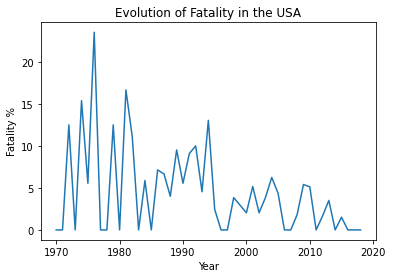

In [1320]:
sns.lineplot(data= table2, x= 'Year', y= 'Fatality %')
plt.title('Evolution of Fatality in the USA')

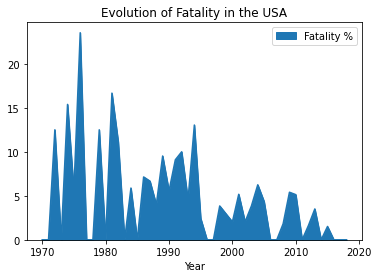

In [1321]:
table2.plot.area()
plt.title('Evolution of Fatality in the USA')
plt.plot()
plt.show()


Text(0.5, 1.0, 'Number of people that died due to attacks of sharks in the USA')

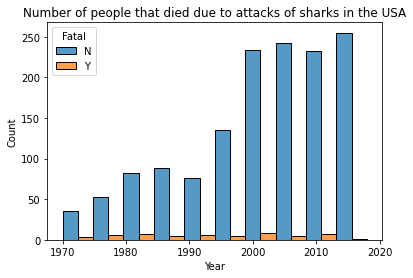

In [1322]:
graph_6 = sns.histplot(data= sorted_df, x = 'Year', multiple = 'dodge', hue= 'Fatal', bins=10)
plt.title('Number of people that died due to attacks of sharks in the USA')
